In [80]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Data Cleaning and Exploratory Analysis

In [192]:
df = pd.read_csv('.kaggle/hospital-readmissions/train.csv')

df = df.replace({True: 1, False: 0})

df.head()
df.info()

C:\Users\retar\AppData\Local\Temp\ipykernel_7412\1383036954.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  int64
 9   race_AfricanAmerican                      25000 non-null  int64
 10  gender_Female                             25000 non-null  

In [160]:
# check for nulls in each column
null_counts = df.isnull().sum()
print(null_counts[null_counts>0]) # Display only columns with null values

Series([], dtype: int64)


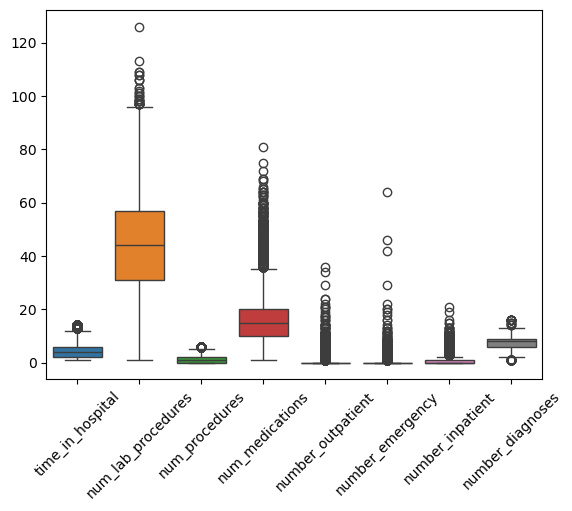

In [202]:
# Example: Visualize outliers in a boxplot

boxplot = sns.boxplot(df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']])
plt.setp(boxplot.get_xticklabels(), rotation=45)
plt.show()

In [170]:
# Examine readmission rates by demographics

# Define demographic features
demographics = ['age_[70-80)','age_[60-70)','age_[50-60)','age_[80-90)','age_[40-50)','gender_Female','race_Caucasian','race_AfricanAmerican']

# Compute readmission rates by demographics
readmission_rates = readmission_rates.groupby(demographics)['readmitted'].mean().reset_index()
readmission_rates['readmission_rate'] = readmission_rates['readmitted'] * 100

readmission_rates.head()

,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),gender_Female,race_Caucasian,race_AfricanAmerican,readmitted,readmission_rate
0,0,0,0,0,0,0,0,0,0.229508,22.950820
1,0,0,0,0,0,0,0,1,0.436019,43.601896
2,0,0,0,0,0,0,1,0,0.399267,39.926740
3,0,0,0,0,0,1,0,0,0.298851,29.885057
4,0,0,0,0,0,1,0,1,0.390000,39.000000


In [172]:
# Convert boolean to binary (0 and 1)
readmission_rates[demographics] = readmission_rates[demographics].astype(int)

# Display the updated DataFrame
readmission_rates.head()

,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),gender_Female,race_Caucasian,race_AfricanAmerican,readmitted,readmission_rate
0,0,0,0,0,0,0,0,0,0.229508,22.950820
1,0,0,0,0,0,0,0,1,0.436019,43.601896
2,0,0,0,0,0,0,1,0,0.399267,39.926740
3,0,0,0,0,0,1,0,0,0.298851,29.885057
4,0,0,0,0,0,1,0,1,0.390000,39.000000


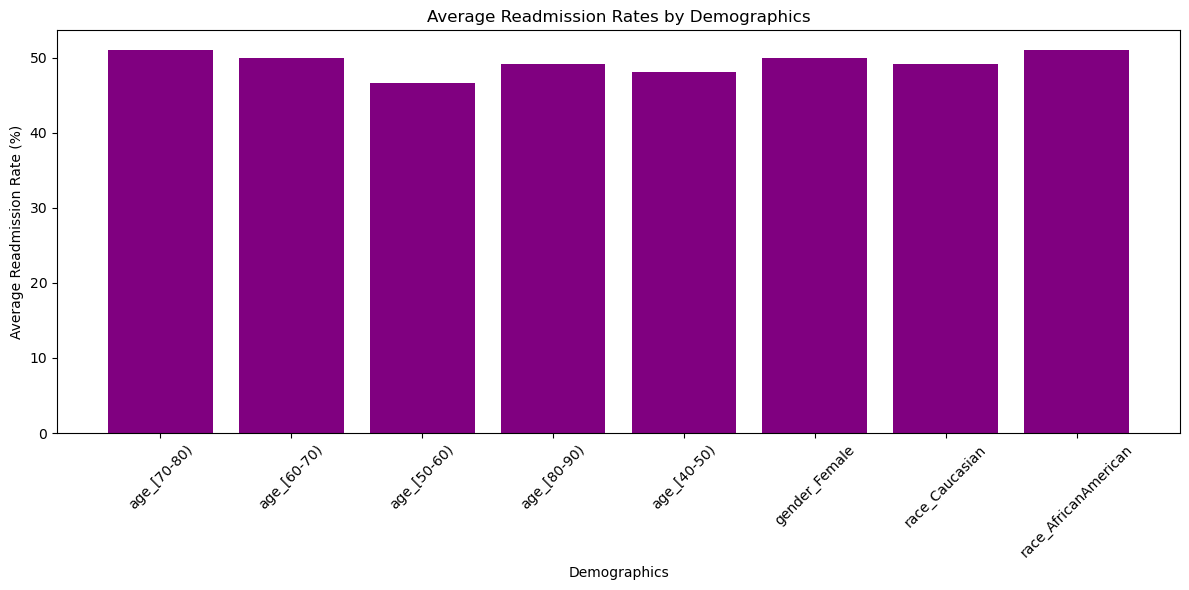

In [168]:
# Create a new DataFrame for plotting
plot_data = readmission_rates.melt(id_vars='readmission_rate', var_name='Demographics', value_name='Presence')

# Filtering out rows where presence is 0
plot_data = plot_data[plot_data['Presence'] == 1]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(plot_data['Demographics'], plot_data['readmission_rate'], color='purple')
plt.title('Average Readmission Rates by Demographics')
plt.xlabel('Demographics')
plt.ylabel('Average Readmission Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

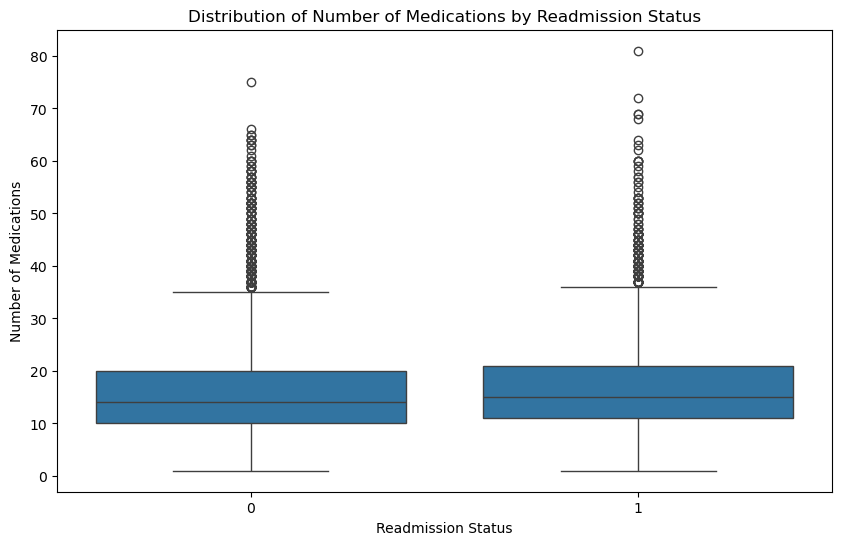

In [174]:
# Box plot of number of medications by readmission status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='readmitted', y='num_medications')
plt.title("Distribution of Number of Medications by Readmission Status")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Medications")
plt.show()

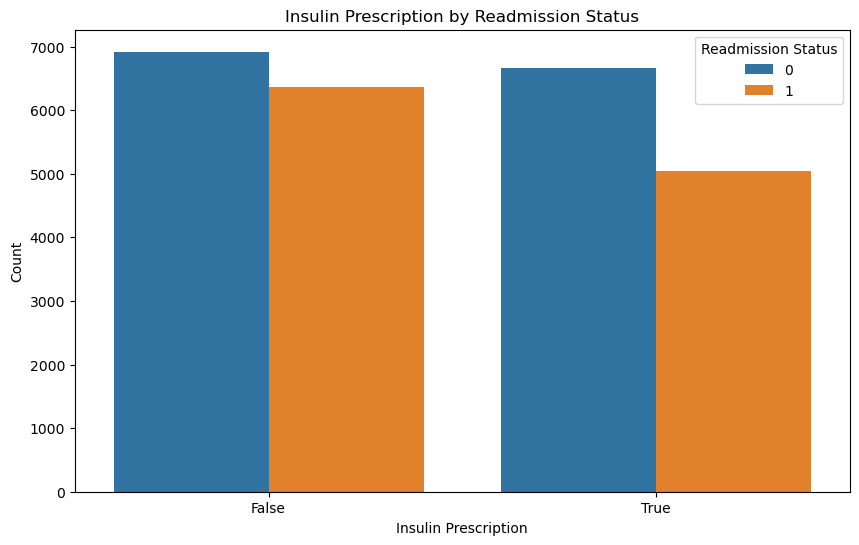

In [184]:
# Bar plot of insulin prescription by readmission status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insulin_No', hue='readmitted')
plt.title("Insulin Prescription by Readmission Status")
plt.xlabel("Insulin Prescription")
plt.ylabel("Count")
plt.legend(title="Readmission Status")
plt.show()

<h2>Creating a Correlation Matrix<h2/>
<h3>Examining Numeric Values</h3>
We will begin with examining numeric variables that have a high correlation with patients that were readmitted

In [244]:
# Group numeric columns together in a variable
numeric_columns = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency',
                    'number_inpatient','number_diagnoses','readmitted']

# Create a correlation matrix
correlation_matrix = df[numeric_columns].corr()

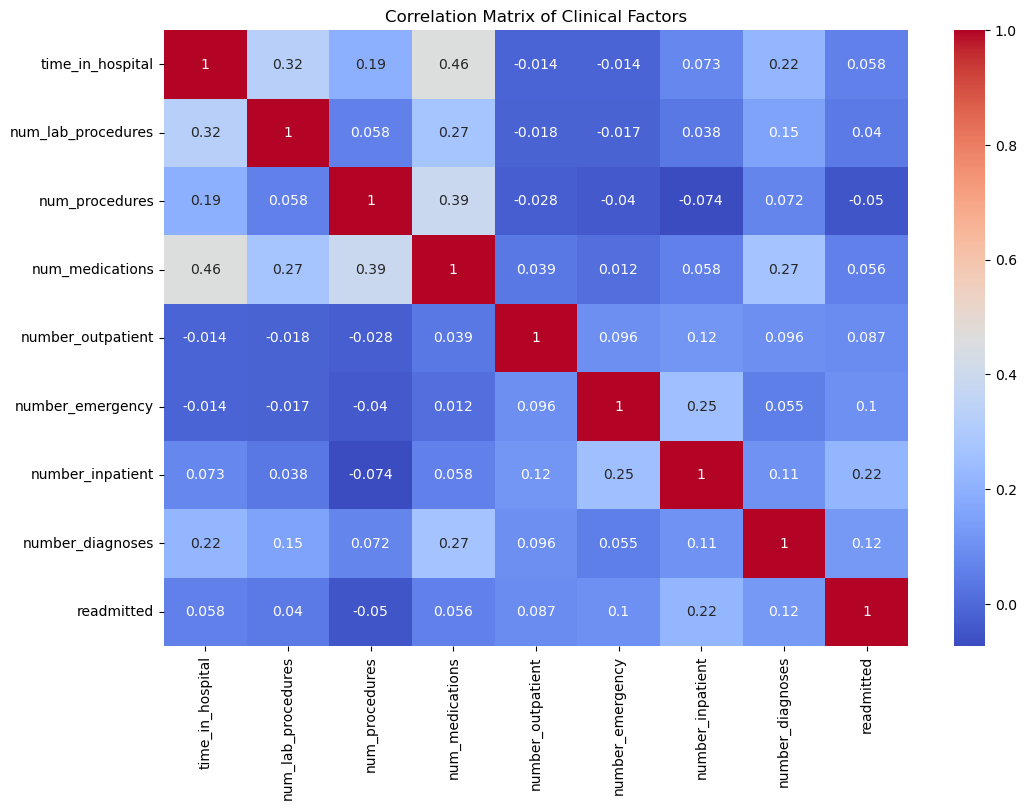

In [246]:
# Create a heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Clinical Factors")
plt.show()

In [216]:
# Correlation matrix for medications
# List of columns you want in the correlation matrix
med_columns = ['max_glu_serum_None','A1Cresult_None','metformin_No','repaglinide_No','nateglinide_No','chlorpropamide_No','glimepiride_No',
                    'acetohexamide_No','glipizide_No','glyburide_No','tolbutamide_No','pioglitazone_No','rosiglitazone_No','acarbose_No','miglitol_No',
                    'troglitazone_No','tolazamide_No','examide_No','citoglipton_No','insulin_No','glyburide-metformin_No','glipizide-metformin_No',
                    'glimepiride-pioglitazone_No','metformin-rosiglitazone_No','metformin-pioglitazone_No','change_No','readmitted']

# Create a correlation matrix for only these columns
correlation_matrix_meds = df[med_columns].corr()
correlation_matrix_meds

,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,chlorpropamide_No,glimepiride_No,acetohexamide_No,glipizide_No,glyburide_No,...,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,readmitted
max_glu_serum_None,1.000000,-0.075219,-0.033214,-0.016428,-0.020814,0.000075,-0.033495,NaN,-0.000565,0.005556,...,NaN,NaN,0.001934,-0.014869,-0.003049,-0.001525,NaN,NaN,-0.013748,-0.015637
A1Cresult_None,-0.075219,1.000000,0.047962,0.017028,0.005527,-0.004240,0.017968,NaN,0.009154,0.006284,...,NaN,NaN,0.096759,0.003863,-0.005736,-0.002868,NaN,NaN,0.086700,0.007822
metformin_No,-0.033214,0.047962,1.000000,-0.010581,0.022461,-0.009416,0.045329,NaN,0.085821,0.133042,...,NaN,NaN,-0.031536,-0.024037,0.001779,-0.003107,NaN,NaN,0.326781,0.031182
repaglinide_No,-0.016428,0.017028,-0.010581,1.000000,-0.004001,-0.003505,-0.010910,NaN,-0.013582,-0.027028,...,NaN,NaN,0.003357,-0.002606,-0.001652,-0.000826,NaN,NaN,0.084657,-0.026755
nateglinide_No,-0.020814,0.005527,0.022461,-0.004001,1.000000,-0.002318,0.015535,NaN,-0.012309,-0.023242,...,NaN,NaN,0.001595,-0.006908,-0.001092,-0.000546,NaN,NaN,0.056568,-0.008963
chlorpropamide_No,0.000075,-0.004240,-0.009416,-0.003505,-0.002318,1.000000,-0.006284,NaN,-0.010025,-0.009129,...,NaN,NaN,-0.019615,-0.002148,-0.000340,-0.000170,NaN,NaN,-0.012672,0.003638
glimepiride_No,-0.033495,0.017968,0.045329,-0.010910,0.015535,-0.006284,1.000000,NaN,-0.072584,-0.071937,...,NaN,NaN,0.003545,-0.005127,-0.002962,-0.001481,NaN,NaN,0.139220,0.011529
acetohexamide_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glipizide_No,-0.000565,0.009154,0.085821,-0.013582,-0.012309,-0.010025,-0.072584,NaN,1.000000,-0.103796,...,NaN,NaN,-0.027353,-0.026808,0.004925,-0.002362,NaN,NaN,0.201707,-0.016274
glyburide_No,0.005556,0.006284,0.133042,-0.027028,-0.023242,-0.009129,-0.071937,NaN,-0.103796,1.000000,...,NaN,NaN,-0.078142,-0.007403,-0.004302,-0.002151,NaN,NaN,0.176579,-0.000266


In [234]:
# Create a correlation matrix for only these columns
correlation_matrix_demographics = df[demographics +['readmitted']].corr()
correlation_matrix_demographics

,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),gender_Female,race_Caucasian,race_AfricanAmerican,readmitted
age_[70-80),1.000000,-0.306302,-0.264809,-0.262471,-0.190022,0.010175,0.066243,-0.062569,0.018224
age_[60-70),-0.306302,1.000000,-0.241630,-0.239497,-0.173390,-0.052264,-0.001486,-0.010610,0.006725
age_[50-60),-0.264809,-0.241630,1.000000,-0.207054,-0.149901,-0.045604,-0.074962,0.072327,-0.021378
age_[80-90),-0.262471,-0.239497,-0.207054,1.000000,-0.148578,0.065087,0.110146,-0.102326,0.021174
age_[40-50),-0.190022,-0.173390,-0.149901,-0.148578,1.000000,-0.026822,-0.083946,0.083285,-0.005462
gender_Female,0.010175,-0.052264,-0.045604,0.065087,-0.026822,1.000000,-0.063794,0.081356,0.021156
race_Caucasian,0.066243,-0.001486,-0.074962,0.110146,-0.083946,-0.063794,1.000000,-0.828750,0.027060
race_AfricanAmerican,-0.062569,-0.010610,0.072327,-0.102326,0.083285,0.081356,-0.828750,1.000000,0.000513
readmitted,0.018224,0.006725,-0.021378,0.021174,-0.005462,0.021156,0.027060,0.000513,1.000000
